In [1]:
# 统计某个量的数量，并生成图表
# 请用py310内核运行，运行时长16min
import os
import json
from matplotlib import pyplot

/home/xingao/anaconda3/envs/py310/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [87]:
# def countkeyofdata(keyname, filename):

#     numberdict={}
#     with open(filename, 'r') as pr:
#         datas=json.load(pr)
#         for data in datas:
#             if keyname not in data.keys():
#                 continue
#             if str(data[keyname]) not in numberdict.keys():
#                 numberdict.setdefault(str(data[keyname]),1)
#             else:
#                 numberdict[str(data[keyname])]+=1
#     return numberdict



def count_nidvalue_onefile(filename, slt=True):
    numberdict={}
    with open(filename, 'r') as pr:
        datas=json.load(pr)
        for data in datas:
            if data=={}:
                continue
            if slt:
                if eval(data["INVOL"]) not in eval(data["invol_sr_li_tr"]):
                    continue
            if "OPLANES" not in data.keys():
                continue
            if "value" not in data["OPLANES"].keys():
                continue
            if not data["OPLANES"]["tadpole_cancel"]:
                continue
            value=round(data["OPLANES"]["value"],1)
            if value not in numberdict.keys():
                numberdict.setdefault(value,1)
            else:
                numberdict[value]+=1
    return numberdict




def count_refvalue_onefile(filename):

    numberdict={}
    with open(filename, 'r') as pr:
        datas=json.load(pr)
        for data in datas:
            if data=={}:
                continue
            for key in ["invol1", "invol3"]:
                if key not in data.keys():
                    continue
                for datakeyvalue in data[key]:
                    if "satisfied" not in datakeyvalue or "No Oplane" in datakeyvalue:
                        continue
                    try:
                        valuekey=datakeyvalue.split("satisfied ")[1].split(";")[0]
                    except:
                        print(datakeyvalue)
                        datakeyvalue.split("satisfied ")[1].split(";")[0]
                    value=round(float(valuekey),1)
                    # if value==1008.0:
                    #     print(filename)
                    if value not in numberdict.keys():
                        numberdict.setdefault(value,1)
                    else:
                        numberdict[value]+=1
    return numberdict





def count_value_manyfilepath_h11(filepath, nid):
    numberdict={}
    filenames=os.listdir(filepath)
    for filename in filenames:
        if "json" not in filename:
            numberdictonefile=count_value_manyfilepath(filepath+filename+"/", nid)
            numberdict.setdefault(filename,numberdictonefile)
            continue
        else:
            if nid:
                numberdictonefile=count_nidvalue_onefile(filepath+filename)
            else:
                numberdictonefile=count_refvalue_onefile(filepath+filename)

        numberdictkeys=numberdict.keys()
        for numberdictonefilekey in numberdictonefile.keys():
            if numberdictonefilekey not in numberdictkeys:
                numberdict.setdefault(numberdictonefilekey, numberdictonefile[numberdictonefilekey])
            else:
                numberdict[numberdictonefilekey]+=numberdictonefile[numberdictonefilekey]
    return numberdict



def count_value_manyfilepath(filepath, nid):
    numberdict={}
    filenames=os.listdir(filepath)
    for filename in filenames:
        if "json" not in filename:
            numberdictonefile=count_value_manyfilepath(filepath+filename+"/", nid)
        else:
            if nid:
                numberdictonefile=count_nidvalue_onefile(filepath+filename)
            else:
                numberdictonefile=count_refvalue_onefile(filepath+filename)

        numberdictkeys=numberdict.keys()
        for numberdictonefilekey in numberdictonefile.keys():
            
            if numberdictonefilekey not in numberdictkeys:
                numberdict.setdefault(numberdictonefilekey, numberdictonefile[numberdictonefilekey])
            else:
                numberdict[numberdictonefilekey]+=numberdictonefile[numberdictonefilekey]
    return numberdict

In [88]:
# numberdictonefile=count_value_manyfilepath("../../dataout/REF/h11=11/", False)

../../dataout/REF/h11=11/1621.json
../../dataout/REF/h11=11/1621.json
../../dataout/REF/h11=11/1621.json
../../dataout/REF/h11=11/1621.json
../../dataout/REF/h11=11/1621.json
../../dataout/REF/h11=11/1621.json
../../dataout/REF/h11=11/1621.json
../../dataout/REF/h11=11/1621.json


In [ ]:
numberdictref=count_value_manyfilepath("../../dataout/REF/", False)

numberdictnid=count_value_manyfilepath("../../dataout/NID/", True)

with open("../result/d3value.json", 'w') as pout:
    json.dump([numberdictnid, numberdictref], pout, indent=2)


In [2]:
with open("../result/d3value.json", 'r') as pin:# 没按h11划分
    [numberdictnid, numberdictref]=json.load(pin)

In [67]:
numberdictrefh11=count_value_manyfilepath_h11("../../dataout/REF/", False)
numberdictnidh11=count_value_manyfilepath_h11("../../dataout/NID/", True)

with open("../result/d3value_h11.json", 'w') as pout:
    json.dump([numberdictnidh11, numberdictrefh11], pout, indent=2)


In [3]:
with open("../result/d3value_h11.json", 'r') as pin:# 按照h11划分
    [numberdictnidh11, numberdictrefh11]=json.load(pin)

# 下面的效果不太好

In [ ]:
# 对除子反转，按h11划分，画出分布图，效果不好
for h11taddata in numberdictrefh11.keys():
    numberdictrefh1=numberdictrefh11[h11taddata]
    value_num = [[float(x) for x in list(numberdictrefh1.keys())], [numberdictrefh1[x] for x in list(numberdictrefh1.keys())]]

    pyplot.scatter(value_num[0],value_num[1])
    # 添加标题和标签
    pyplot.xlabel("$Q_{D3}$_"+h11taddata)
    pyplot.ylabel("number of reflection involution")

    # 显示图形
    pyplot.show()


In [ ]:
# 比较失败
dictoplot=numberdictrefh11
for h11 in range(2,13):
    dictoplo=dictoplot["h11="+str(h11)]
    tadvalue = [[float(x), dictoplo[x]] for x in list(dictoplo.keys())]
    numofref=sum([x[1] for x in tadvalue])
    # 然后根据numofref的值，对整体进行一个压低，以10000个为界
    if dictoplo=={}:
        continue
    if numofref>10000:
        newtadvalue=[]
        for tadvalu in tadvalue:
            newtadvalue.append([tadvalu[0], 1+int(tadvalu[1]/numofref*10000)])
    else:
        newtadvalue=tadvalue

    dataforplot=[]
    for newtadvalu in newtadvalue:
        dataforplot+=[newtadvalu[0] for _ in range(newtadvalu[1])]
    pyplot.hist(dataforplot, bins=25, density=True)
    # 绘制折线图
pyplot.xlabel("$Q_{D3}$")
pyplot.ylabel("Percent")

pyplot.show()
# 效果还是比较差

# 从这里开始，图大概可用

In [ ]:
# ref d3 charge的上下限以及众数

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


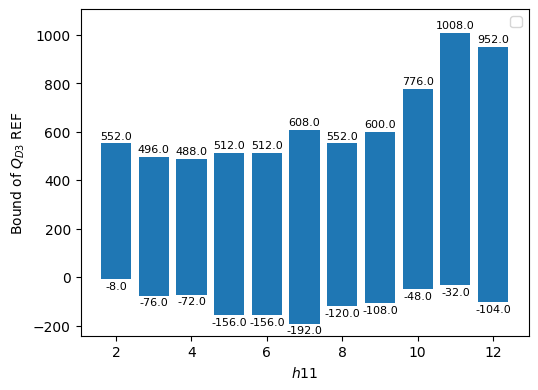

In [7]:
# REF, d3 tadpole vaule上下
dictoplot=numberdictrefh11
h11andvalue=[[],[]]
for h11taddata in dictoplot.keys():
    dictoplo=dictoplot[h11taddata]
    tadvalue = [float(x) for x in list(dictoplo.keys())]
    if dictoplo=={}:
        continue
    tadvalue.sort()
    h11andvalue[0].append([int(h11taddata.split("h11=")[1]), tadvalue[0]])
    h11andvalue[1].append([int(h11taddata.split("h11=")[1]), tadvalue[-1]])
    # 绘制折线图
h11andvalue[0].sort()
h11andvalue[1].sort()
index=[x[0] for x in h11andvalue[0]]
botm= [x[1] for x in h11andvalue[0]]
top=[h11andvalue[1][i][1]-botm[i] for i in range(len(index))]
pyplot.bar(index, top, bottom=botm)
pyplot.ylim([min(botm)-50, max(top)+50])
pyplot.xlabel("$h11$")
pyplot.ylabel("Bound of $Q_{D3}$ REF")
for i in range(11):
    pyplot.text(h11andvalue[0][i][0],h11andvalue[0][i][1]-50, h11andvalue[0][i][1],va="bottom",ha="center",fontsize=8)
    pyplot.text(h11andvalue[1][i][0],h11andvalue[1][i][1]+10, h11andvalue[1][i][1],va="bottom",ha="center",fontsize=8)
pyplot.legend()
pyplot.subplots_adjust(left=0.2, bottom=0.2)
pyplot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


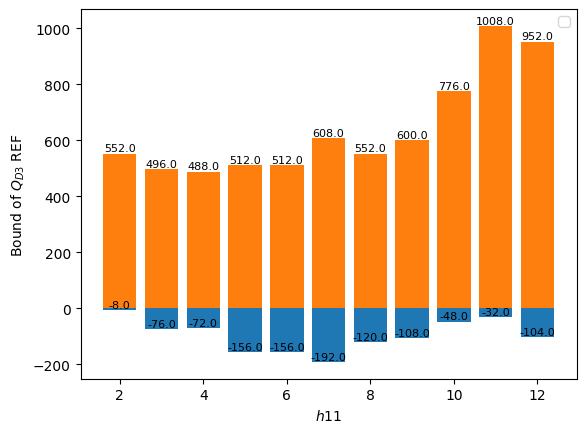

In [70]:
# REF, d3 tadpole vaule上下
dictoplot=numberdictrefh11
h11andvalue=[[],[]]
for h11taddata in dictoplot.keys():
    dictoplo=dictoplot[h11taddata]
    tadvalue = [float(x) for x in list(dictoplo.keys())]
    if dictoplo=={}:
        continue
    tadvalue.sort()
    h11andvalue[0].append([int(h11taddata.split("h11=")[1]), tadvalue[0]])
    h11andvalue[1].append([int(h11taddata.split("h11=")[1]), tadvalue[-1]])
    # 绘制折线图
h11andvalue[0].sort()
h11andvalue[1].sort()
pyplot.bar([x[0] for x in h11andvalue[0]], [x[1] for x in h11andvalue[0]])
pyplot.bar([x[0] for x in h11andvalue[1]], [x[1] for x in h11andvalue[1]])
pyplot.xlabel("$h11$")
pyplot.ylabel("Bound of $Q_{D3}$ REF")
for i in range(11):
    pyplot.text(h11andvalue[0][i][0],h11andvalue[0][i][1], h11andvalue[0][i][1],va="bottom",ha="center",fontsize=8)
    pyplot.text(h11andvalue[1][i][0],h11andvalue[1][i][1], h11andvalue[1][i][1],va="bottom",ha="center",fontsize=8)
pyplot.legend()

pyplot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


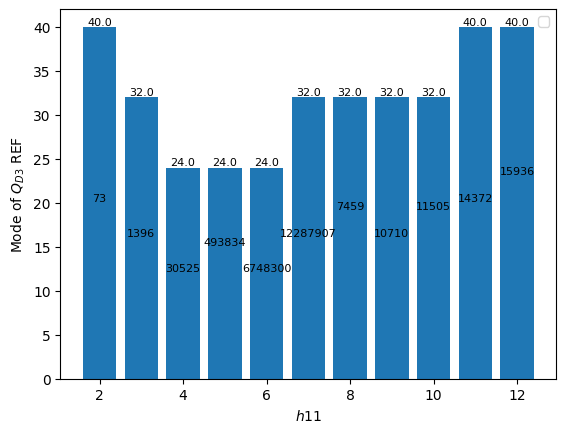

In [71]:
# 每个h11，REF的众数
# 最大最小tadpolevaule柱状图
dictoplot=numberdictrefh11
h11andvalue_mode=[]
for h11taddata in dictoplot.keys():
    dictoplo=dictoplot[h11taddata]
    h11andvalue_mode.append([int(h11taddata.split("h11=")[1]), 0, 0])
    for keyd3value in dictoplo.keys():
        if dictoplo[keyd3value]>h11andvalue_mode[-1][-1]:
            h11andvalue_mode[-1]=[int(h11taddata.split("h11=")[1]), float(keyd3value), dictoplo[keyd3value]]

    
h11andvalue_mode.sort()
pyplot.bar([x[0] for x in h11andvalue_mode], [x[1] for x in h11andvalue_mode])
pyplot.xlabel("$h11$")
pyplot.ylabel("Mode of $Q_{D3}$ REF")
gkdu=0
for i in range(11):
    pyplot.text(h11andvalue_mode[i][0],h11andvalue_mode[i][1],h11andvalue_mode[i][1],va="bottom",ha="center",fontsize=8)
    if h11andvalue_mode[i][1]==gkdu:
        pyplot.text(h11andvalue_mode[i][0],h11andvalue_mode[i][1]/2+3,h11andvalue_mode[i][-1],va="bottom",ha="center",fontsize=8)
        gkdu=h11andvalue_mode[i][1]+3
    else:
        pyplot.text(h11andvalue_mode[i][0],h11andvalue_mode[i][1]/2,h11andvalue_mode[i][-1],va="bottom",ha="center",fontsize=8)
        gkdu=h11andvalue_mode[i][1]
pyplot.legend()
pyplot.show()

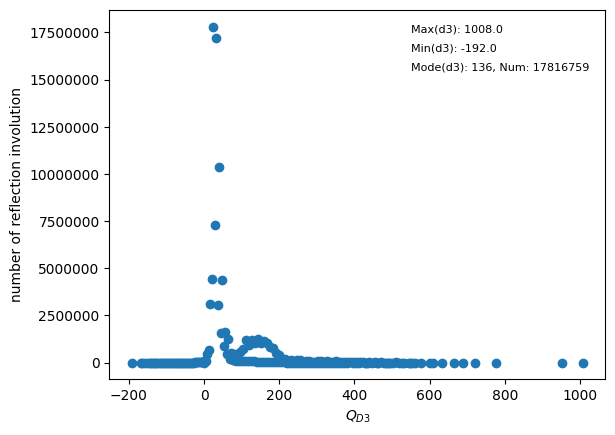

d3最大值： 1008.0 
d3最小值： -192.0 
d3众数： 136 具体数量： 17816759


In [86]:
# 提取字典的键和值，不根据h11划分
x = [float(x) for x in list(numberdictref.keys())]
y = list(numberdictref.values())


# 绘制散点图
fig, ax=pyplot.subplots()
ax.scatter(x, y)
ax.ticklabel_format(style='plain')
# 添加标题和标签
pyplot.xlabel("$Q_{D3}$")
pyplot.ylabel("number of reflection involution")


x.sort()
y.sort()
for keyd3value in numberdictnid.keys():
    if numberdictnid[keyd3value]<y[-1]:
        continue
    break
pyplot.text(550,17500000,"Max(d3): "+str(x[-1]),fontsize=8)
pyplot.text(550,16500000,"Min(d3): "+str(x[0]),fontsize=8)
pyplot.text(550,15500000,"Mode(d3): "+str(keyd3value)+", Num: "+str(y[-1]),fontsize=8)
# 显示图形
pyplot.show()
print("d3最大值：", x[-1], "\nd3最小值：", x[0], "\nd3众数：", keyd3value, "具体数量：", y[-1])

In [73]:
# NID d3 charge的上下限以及众数

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


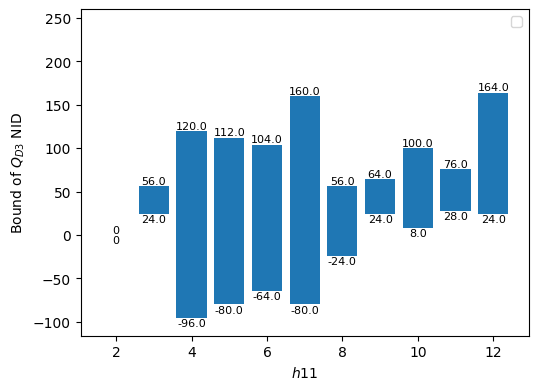

In [10]:
# NID, d3 tadpole vaule上下
dictoplot=numberdictnidh11
h11andvalue_bound=[[],[]]
for h11taddata in dictoplot.keys():
    dictoplo=dictoplot[h11taddata]
    tadvalue = [float(x) for x in list(dictoplo.keys())]
    if dictoplo=={}:
        h11andvalue_bound[0].append([int(h11taddata.split("h11=")[1]), 0])
        h11andvalue_bound[1].append([int(h11taddata.split("h11=")[1]), 0])
        continue
    tadvalue.sort()
    h11andvalue_bound[0].append([int(h11taddata.split("h11=")[1]), tadvalue[0]])
    h11andvalue_bound[1].append([int(h11taddata.split("h11=")[1]), tadvalue[-1]])
    # 绘制折线图
h11andvalue_bound[0].sort()
h11andvalue_bound[1].sort()
index=[x[0] for x in h11andvalue_bound[0]]
botm= [x[1] for x in h11andvalue_bound[0]]
top=[h11andvalue_bound[1][i][1]-botm[i] for i in range(len(index))]
pyplot.bar(index, top, bottom=botm)
pyplot.ylim([min(botm)-20, max(top)+20])
pyplot.xlabel("$h11$")
pyplot.ylabel("Bound of $Q_{D3}$ NID")
for i in range(11):
    pyplot.text(h11andvalue_bound[0][i][0],h11andvalue_bound[0][i][1]-12, h11andvalue_bound[0][i][1],va="bottom",ha="center",fontsize=8)
    pyplot.text(h11andvalue_bound[1][i][0],h11andvalue_bound[1][i][1], h11andvalue_bound[1][i][1],va="bottom",ha="center",fontsize=8)
pyplot.legend()
pyplot.subplots_adjust(left=0.2, bottom=0.2)
pyplot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


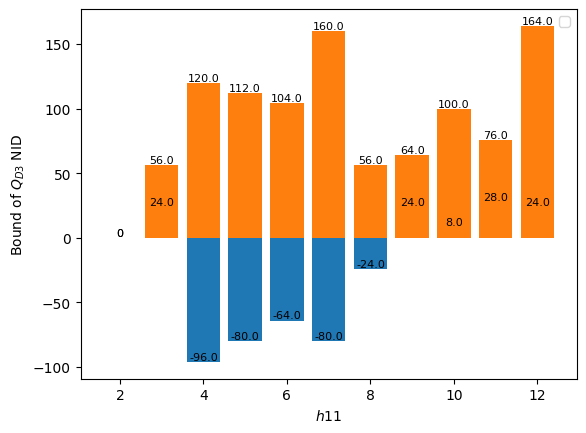

In [74]:
# 每个h11，NID的上下界图
# 最大最小tadpolevaule柱状图
dictoplot=numberdictnidh11
h11andvalue_bound=[[],[]]
for h11taddata in dictoplot.keys():
    dictoplo=dictoplot[h11taddata]
    tadvalue = [float(x) for x in list(dictoplo.keys())]
    if dictoplo=={}:
        h11andvalue_bound[0].append([int(h11taddata.split("h11=")[1]), 0])
        h11andvalue_bound[1].append([int(h11taddata.split("h11=")[1]), 0])
        continue
    tadvalue.sort()
    h11andvalue_bound[0].append([int(h11taddata.split("h11=")[1]), tadvalue[0]])
    h11andvalue_bound[1].append([int(h11taddata.split("h11=")[1]), tadvalue[-1]])
    # 绘制折线图
h11andvalue_bound[0].sort()
h11andvalue_bound[1].sort()
pyplot.bar([x[0] for x in h11andvalue_bound[0]], [x[1] for x in h11andvalue_bound[0]])
pyplot.bar([x[0] for x in h11andvalue_bound[1]], [x[1] for x in h11andvalue_bound[1]])
pyplot.xlabel("$h11$")
pyplot.ylabel("Bound of $Q_{D3}$ NID")
for i in range(11):
    pyplot.text(h11andvalue_bound[0][i][0],h11andvalue_bound[0][i][1], h11andvalue_bound[0][i][1],va="bottom",ha="center",fontsize=8)
    pyplot.text(h11andvalue_bound[1][i][0],h11andvalue_bound[1][i][1], h11andvalue_bound[1][i][1],va="bottom",ha="center",fontsize=8)
pyplot.legend()

pyplot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


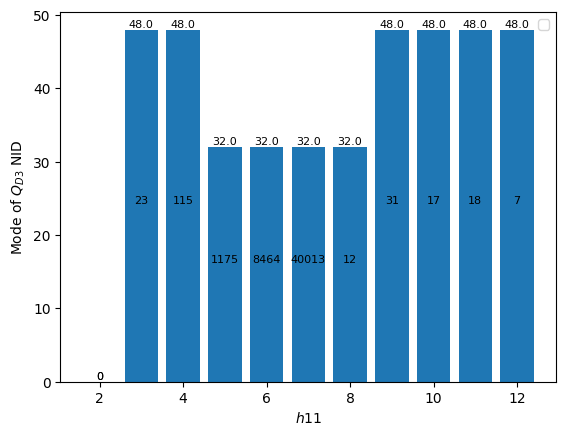

In [75]:
# 每个h11，NID的众数
# 最大最小tadpolevaule柱状图
dictoplot=numberdictnidh11
h11andvalue_mode=[]
for h11taddata in dictoplot.keys():
    dictoplo=dictoplot[h11taddata]
    h11andvalue_mode.append([int(h11taddata.split("h11=")[1]), 0, 0])
    for keyd3value in dictoplo.keys():
        if dictoplo[keyd3value]>h11andvalue_mode[-1][-1]:
            h11andvalue_mode[-1]=[int(h11taddata.split("h11=")[1]), float(keyd3value), dictoplo[keyd3value]]

    
h11andvalue_mode.sort()
pyplot.bar([x[0] for x in h11andvalue_mode], [x[1] for x in h11andvalue_mode])
pyplot.xlabel("$h11$")
pyplot.ylabel("Mode of $Q_{D3}$ NID")
for i in range(11):
    pyplot.text(h11andvalue_mode[i][0],h11andvalue_mode[i][1],h11andvalue_mode[i][1],va="bottom",ha="center",fontsize=8)
    pyplot.text(h11andvalue_mode[i][0],h11andvalue_mode[i][1]/2,h11andvalue_mode[i][-1],va="bottom",ha="center",fontsize=8)
pyplot.legend()

pyplot.show()

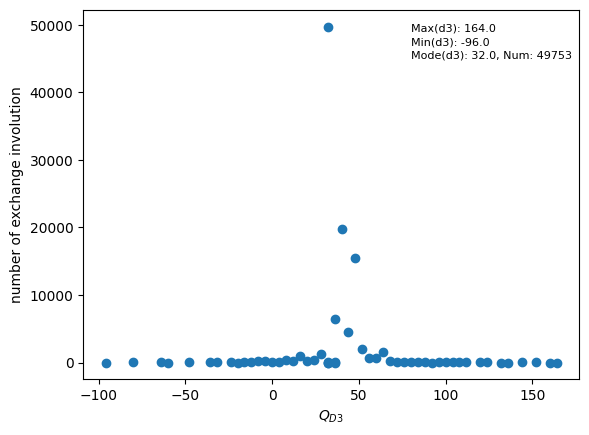

d3最大值： 164.0 
d3最小值： -96.0 
d3众数： 32.0 具体数量： 49753


In [83]:
# 提取字典的键和值，不根据h11划分
x = [float(x) for x in list(numberdictnid.keys())]
y = list(numberdictnid.values())


# 绘制散点图
fig, ax=pyplot.subplots()
ax.scatter(x, y)
ax.ticklabel_format(style='plain')
# 添加标题和标签
pyplot.xlabel("$Q_{D3}$")
pyplot.ylabel("number of exchange involution")

x.sort()
y.sort()
for keyd3value in numberdictnid.keys():
    if numberdictnid[keyd3value]<y[-1]:
        continue
    break
pyplot.text(80,49000,"Max(d3): "+str(x[-1]),fontsize=8)
pyplot.text(80,47000,"Min(d3): "+str(x[0]),fontsize=8)
pyplot.text(80,45000,"Mode(d3): "+str(keyd3value)+", Num: "+str(y[-1]),fontsize=8)
# 显示图形
pyplot.show()

print("d3最大值：", x[-1], "\nd3最小值：", x[0], "\nd3众数：", keyd3value, "具体数量：", y[-1])